<a href="https://colab.research.google.com/github/sarahrihan/Linear_Regression/blob/main/Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1




---

Name: Sarah Rihan


---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()   #This function was used to inspect the data types and the amount of null objects, to proceed with data cleaning properly.
            # discovered that odometer, sellingprice, and saledate were incorrectly loaded as object while they should be numeric
df['color'].value_counts() #to manually check what the mode is to replace the missing values (missing values are -)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


,count
color,
black,9156
white,8693
gray,7046
silver,6982
blue,4244
red,3685
—,2246
gold,948
green,891


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df['odometer'] = df['odometer'].str.replace('mi', '').str.strip() #removing the "mi" to allow to change the datatype UNCOMMENT
df['sellingprice'] = df['sellingprice'].str.replace('$', '').str.strip() #removing the $ to allow to change the datatype
df['sellingprice'] = df['sellingprice'].astype(int) #transformed sellingprice into int since it is numeric
df['odometer'] = df['odometer'].astype(np.float64) #transformed float64 into int since it is numeric

ColorMode=df['color'].mode().iloc[0] #gets mode and the iloc gets the value of the mode since it is returned as a list
df['color'] = df['color'].replace("—", ColorMode) #replacing the blank colors mode
df['color'].value_counts() #to ensure that the value was replaced properly
df = df.rename(columns={'odometer': 'odometer (mi)', 'sellingprice': 'sellingprice $'})
#we repeated the same for interior color

InteriorMode=df['interior'].mode().iloc[0]
df['interior'] = df['interior'].replace("—", ColorMode)
df['interior'].value_counts()

df.loc[df['body'].str.contains('cab', case=False), 'body'] = 'Pickup Truck' #we did this locates any entry containing cab and replces it with pickup truck to reduce data
df.loc[df['body'].str.contains('supercrew', case=False), 'body'] = 'Pickup Truck' #found it after applying the df['body'].value_counts() to ensure data was reduced
df.loc[df['body'].str.contains('van', case=False), 'body'] = 'Minivan'
df.loc[df['body'].str.contains('sedan', case=False), 'body'] = 'Sedan'
df.loc[df['body'].str.contains('suv', case=False), 'body'] = 'SUV'
df.loc[df['body'].str.contains('hatchback', case=False), 'body'] = 'Hatchback'
df.loc[df['body'].str.contains('convertible', case=False), 'body'] = 'Convertible'
df.loc[df['body'].str.contains('coupe', case=False), 'body'] = 'Coupe'
df.loc[df['body'].str.contains('koup', case=False), 'body'] = 'Coupe' #found it after applying the df['body'].value_counts() to ensure data was reduced
df.loc[df['body'].str.contains('wagon', case=False), 'body'] = 'Wagon'

corr = df.corr(numeric_only=True) #matrix shows high negative correlation between year of making vehicle and odometer
corr

,year,condition,odometer (mi),sellingprice $
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer (mi),-0.777219,-0.540371,1.000000,-0.580900
sellingprice $,0.581164,0.529141,-0.580900,1.000000


In [ ]:
df['body'].unique() #ensuring that cleaning and categorizing body column was done properly

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mi),color,interior,seller,sellingprice $,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

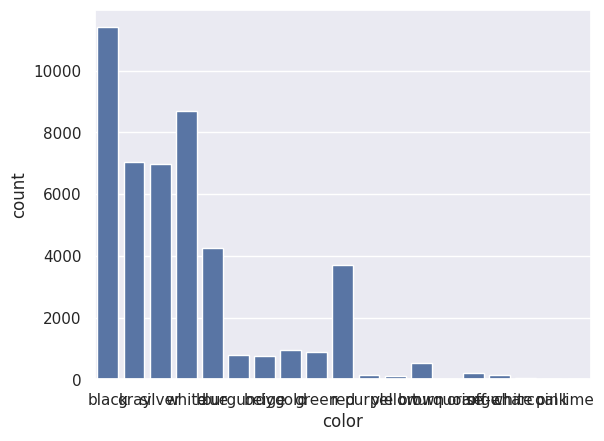

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

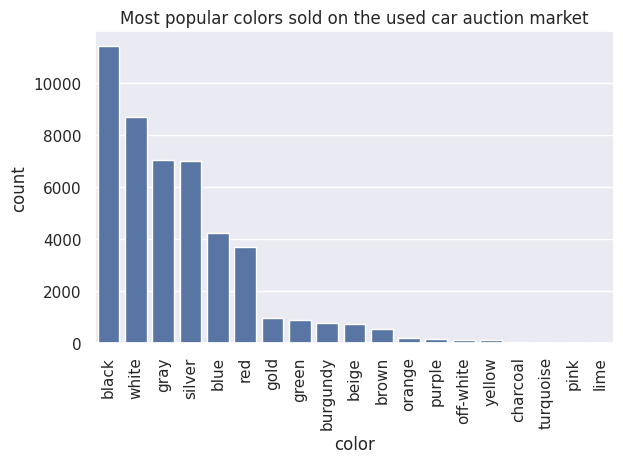

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

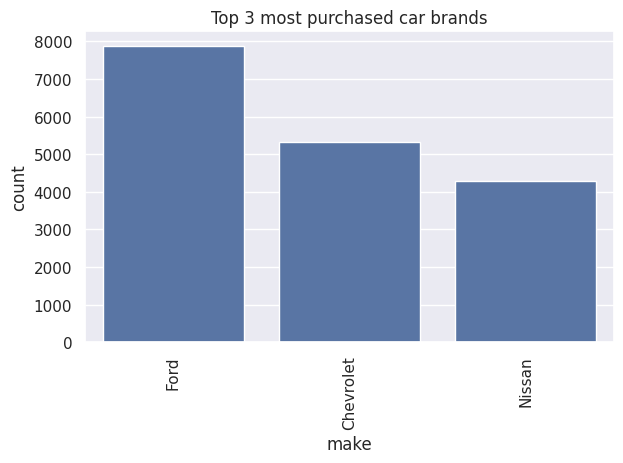

In [ ]:
largestBrands = df['make'].value_counts().nlargest(3)
sns.countplot(x='make', data=df, order=largestBrands.index).set(title='Top 3 most purchased car brands') #a bar plot is useful for showing the distribution of values in numerical data, that's why it was chosen for this question
plt.xticks(rotation=90)
plt.tight_layout()


**Answer for Q1**: The top 3 most popular car brands are Ford with nearly 8,000 cars sold, followed by Chevlrolet & finally Nissan.

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

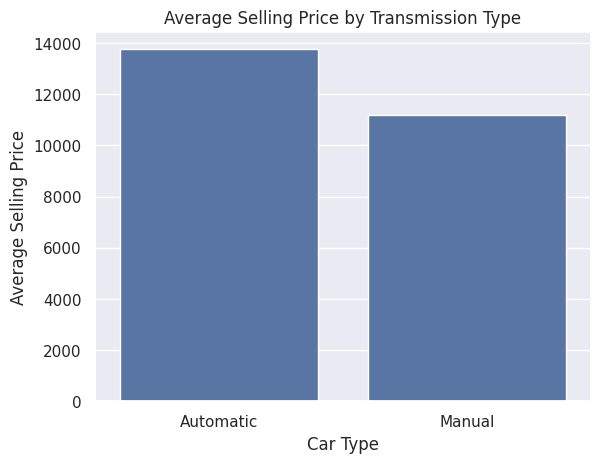

In [ ]:
automatic= df[df['transmission'] == 'automatic']
automaticMean=automatic['sellingprice $'].mean() #obtaining the mean of selling prices of automatic cars
manual= df[df['transmission'] == 'manual']
manualMean=manual['sellingprice $'].mean() #obtaining the mean of selling prices of manual cars
sns.barplot(x=["Automatic", "Manual"], y=[automaticMean, manualMean]) #simirlar to the one above, a bar plot was chosen since it is useful for showing the distribution of values in numerical data
plt.xlabel("Car Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Transmission Type")
plt.show()


**Answer for Q2**:Yes, automatic cars do have a higher mean of selling prices than manual cars meaning they cost more on average

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

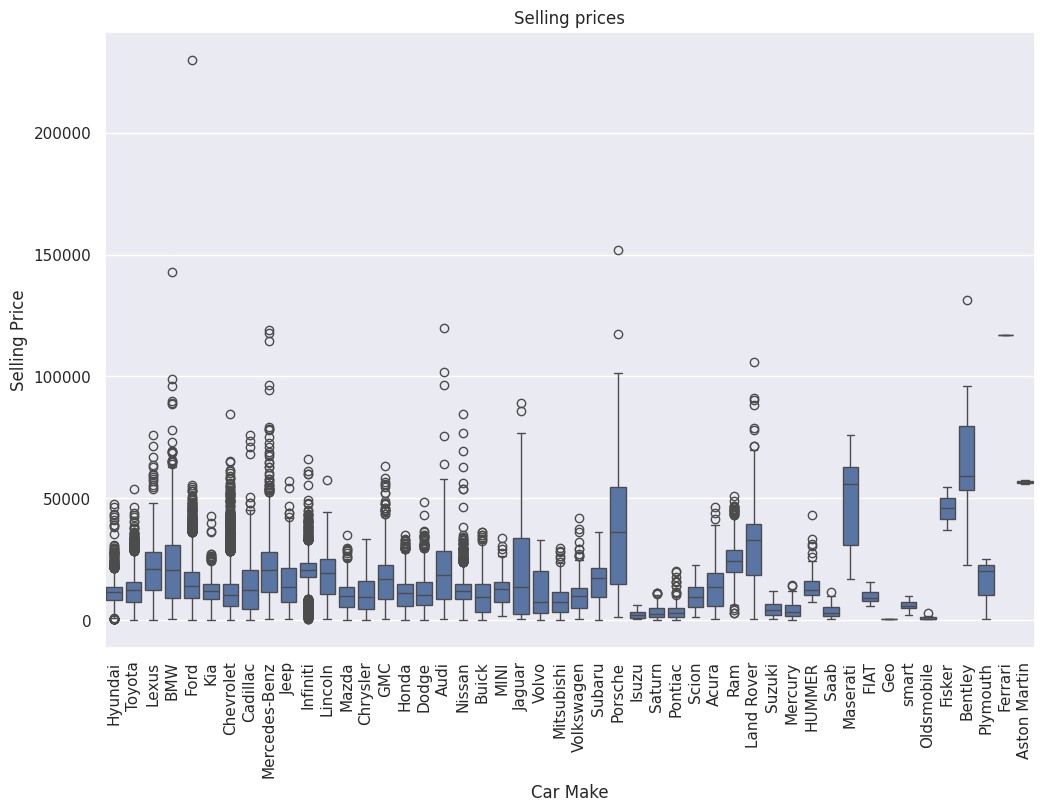

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='make', y='sellingprice $', data=df) #A boxplot was used here because it shows the distribution of data and any outliers

plt.title('Selling prices')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)

plt.show()

**Answer for Q3**: The widest distributions is shown in the brand Porsche followed by Jaguar: this is indicated by the large distance between the whiskers of the Porsche Box. The 2 most expensive brands seem to be Ferari followed by Porsche; however, it's important to note that Ferari only exists in 1 instance in the Dataset. Additionally, the expensive car brands were determined without considering outliers; but if outliers were to be considered then the 2 most expensive car brands would be Ford followed by Porsche.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

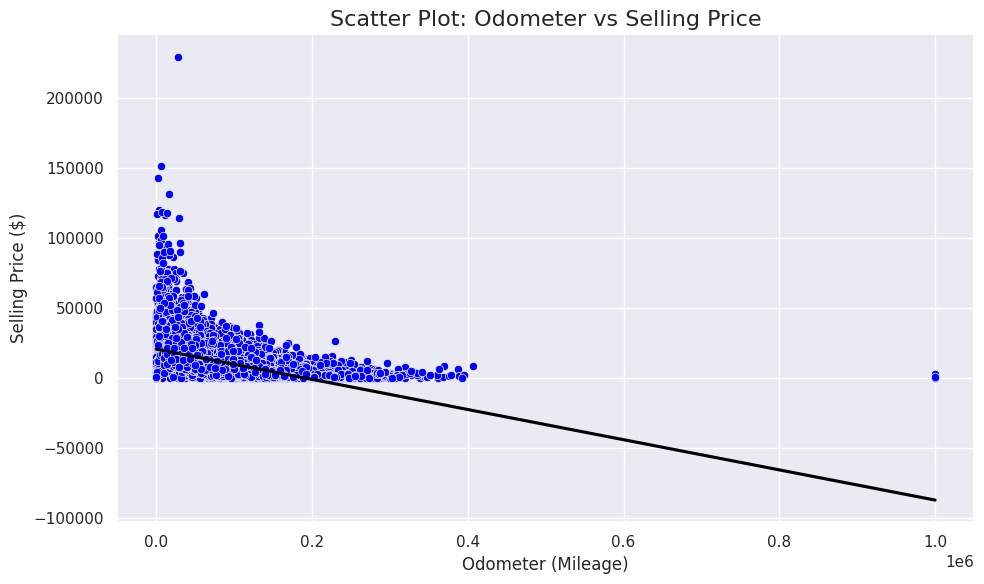

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer (mi)', y='sellingprice $', data=df, color='blue')
sns.regplot(x='odometer (mi)', y='sellingprice $', data=df, scatter=False, color='black', ci=None) #line of best fit plotting
plt.title('Scatter Plot: Odometer vs Selling Price', fontsize=16)
plt.xlabel('Odometer (Mileage)', fontsize=12)
plt.ylabel('Selling Price ($)', fontsize=12)


plt.tight_layout()
plt.show()

**Answer for Q4**: According to the best fit line on the graph above, Selling Price seems to have an inverse linear relationship with Mileage, meaning as mileage increases, a car's selling price decreases.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

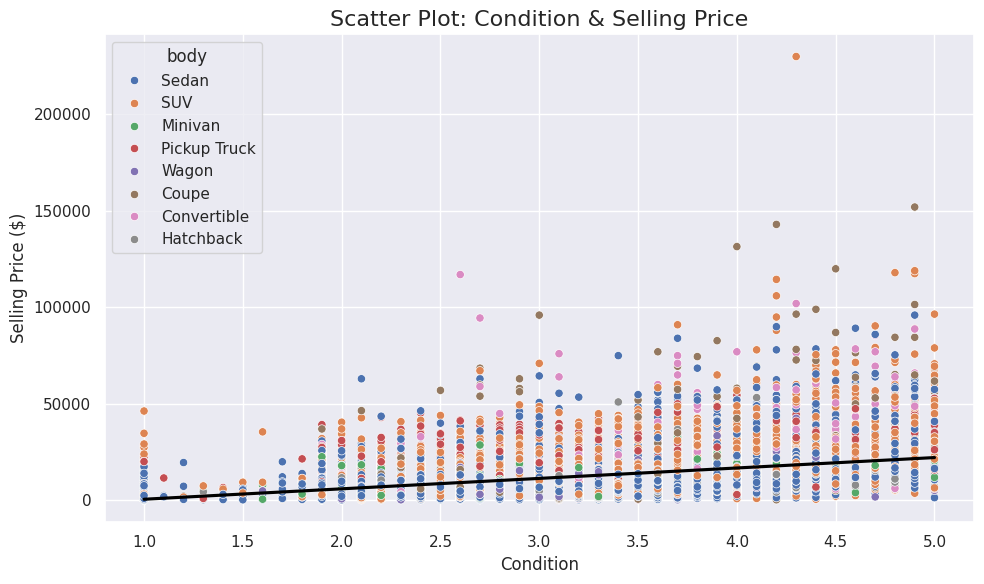

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='condition', y='sellingprice $', data=df, hue='body', palette='deep')
sns.regplot(x='condition', y='sellingprice $', data=df, scatter=False, color='black', ci=None) #line of best fit plotting
plt.title('Scatter Plot: Condition & Selling Price', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

**Answer for Q5**: According to the best fit line on the graph above, Selling Price seems to have an direct linear relationship with Condition, meaning as condition improves, a car's selling price increases.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

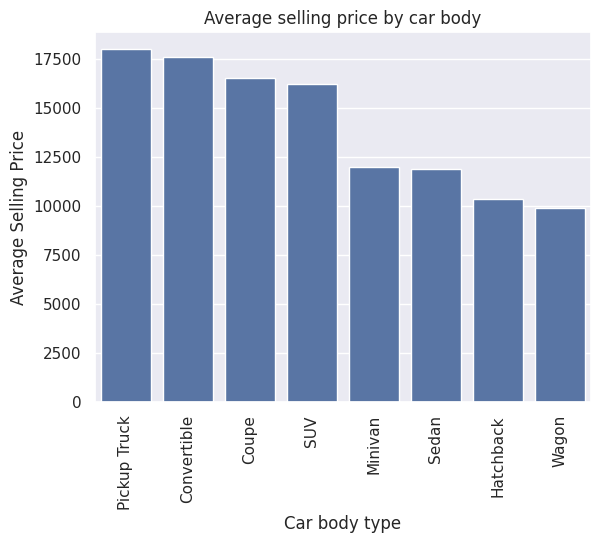

In [ ]:
meanPrice=df.groupby('body')['sellingprice $'].mean().reset_index()
meanPrice= meanPrice.sort_values(by='sellingprice $', ascending=False) #obtaining the mean selling price for each car body type, sorting mean values in ascending order
sns.barplot(x='body', y='sellingprice $', data=meanPrice) #a bar plot was chosen since it is useful for showing the distribution of values in numerical data
plt.xlabel("Car body type")
plt.ylabel("Average Selling Price")
plt.title("Average selling price by car body")
plt.xticks(rotation=90)
plt.show()



**Answer for Q6**: Yes, the graph shows a change in the mean car prices on each body type. Rank from most to least expensive is as follows: Pickup Truck, Covertible, Coupe, SUV, Minivan & Sedan, Hatchback, Wagon.
Most Expensive: Pickup Truck; Least Expensive: Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
categorical_columns = ['body', 'make'] #we chose to encode make and body, since we are going to be predicting selling price, and we believe transmission and body will affect the selling price
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           dtype='int8')
#normalizing the odometer value since it is going to be too large
numerical_columns = ['odometer (mi)']
df_encode[numerical_columns] = (
    df_encode[numerical_columns] - df_encode[numerical_columns].min()
) /(
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)
df_encode = df_encode.drop(['vin', 'trim', 'model', 'state', 'seller', 'interior', 'saledate','color', 'transmission'], axis=1)
#here we picked the columns for the regression model, we chose body, make, odometer, condition, and year for our independent variables
#we chose sellingprice as our dependent variable
df=df_encode
x = df_encode.drop('sellingprice $',axis=1) #independent variable
y = df_encode['sellingprice $'] #dependent variable
df=df_encode
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)
df.head()



,year,condition,odometer (mi),sellingprice $,body_Convertible,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,...,make_Ram,make_Saab,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart
0,2013,3.9,0.050403,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,0.017845,29900,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2012,4.1,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,0.145302,3200,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,0.006713,22100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [ ]:
lin_reg = LinearRegression() #model initialization

lin_reg.fit(x_train, y_train); #model training & fitting
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])] #parameter initialization
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_)) #parameter extraction from model

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta}) #parameter dataframe initialization
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-1.909083e+06
1,theta_1,year,9.588803e+02
2,theta_2,condition,1.707281e+03
3,theta_3,odometer (mi),-4.296326e+04
4,theta_4,body_Convertible,5.542023e+02
5,theta_5,body_Coupe,1.308374e+03
6,theta_6,body_Hatchback,-4.683667e+03
7,theta_7,body_Minivan,-2.337737e+02
8,theta_8,body_Pickup Truck,6.231980e+03
9,theta_9,body_SUV,1.947866e+03


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

The root mean square error (RMSE) is:  5448.825417768882
R^2 obtained is: 0.6786461425946456


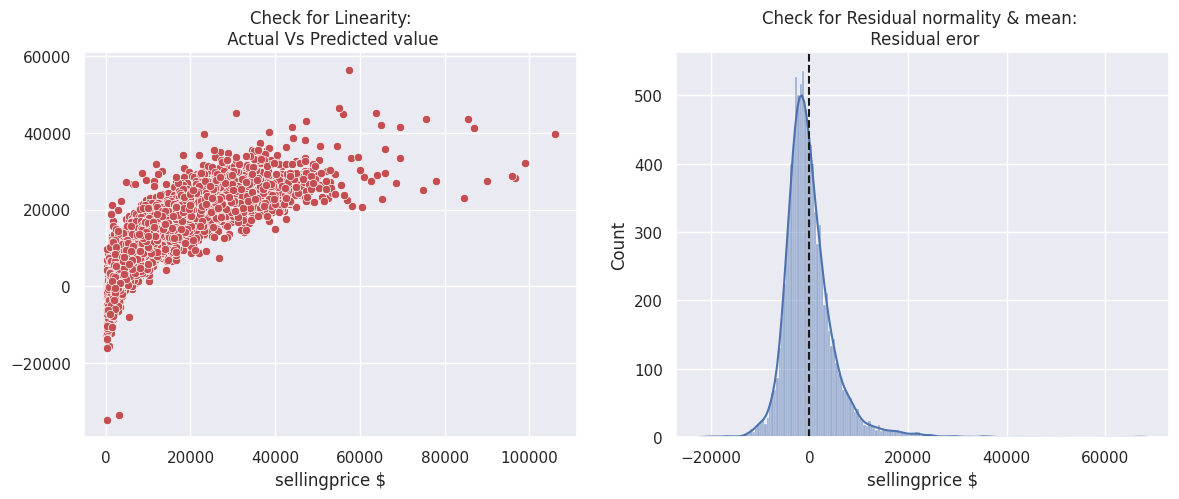

In [ ]:
y_pred = lin_reg.predict(x_test) #prediction of trained model based on dataset
#evaluation
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test) #comparing predicted values to actual values to calculate RMSE
#R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square) #computing and printing R^2 & RMSE to evaluate model performance
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121) #adding 1st graph
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r') #scatter plot creation; "Linearity Check" graph shows whether or not predicted values follow a linear pattern
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
#checking for residual normality & mean
ax = f.add_subplot(122) #adding 2nd graph
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True) #histplot creation; "Residual error plot" shows whether or not errors of model are normally distributed
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--') #adding dashed line at the mean
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: When we picked the columns for the regression model, we chose Body, Make, Odometer(mi), Condition, and Year for our independent variables, and we chose Selling Price as our dependent variable.
Why we chose the columns:
It makes sense for Selling Price to be our dependent variable since in the car sales world sales price is among the most important aspects, and predicting how much value a car holds price wise is of great importance to sellers.
As for the independent variables:
Body and Make were chosen since car prices are determined first and foremost by their make and body.
Odometer(mi) is included because the mileage of cars inversely affects selling price
Condition is included because it directly affects car prices
Year is included because it had a high correlation to odometer and together they represented different things that were important to our data prediction model
This was discovered because of the correlation matrix we generated in the preparation phase
All these independent variables together formed a well rounded price prediction model, since as we see in the real car market all of these factors are factors buyers consider when buying used cars.

According to the labs the Root Mean Squared Error (RMSE) shows the deviation between predicted and actual values. In our case, it is 5448. Hence, the deviation between predicted car Selling Prices and actual selling prices is 5,448 dollars.

Our R^2 Value amounted to 0.6788013037728272 (approximately 67.8%) as seen on the Residual Error Plot & Linearity Graph above; which is considered not acceptable on an academic level (Acceptance = 0.95), however, according to corporate sources, acceptance levels start at 0.3. Taking into account the nature of the project’s dataset (Car Prices), 0.678 is regarded as a moderately acceptable value. This value means that our model can predict how a car’s selling price can be affected by body, make, odometer, condition, and year with a 67.8% accuracy level; this means that 32.2% of the model is deemed unexplainable leaving room for future improvement to both the model and the dataset.  
Possible avenues to be explored for future attempts of refining this model & dataset can include:
Adding more information regarding Seasonal Market Demand and Current Trends
Using more sophisticated methods of encoding, for example, Target Encoding (source: geeksforgeeks.org) rather than the one used in the model.
Regular encoding has proved to cause issues while working on the model as it caused multiple errors while attempting to encode the Color column; Target Encoding generally works better with more complicated categorical attributes in large datasets so it might work better in future attempts.

The reason why encoding was utilized in the model was due to the existence of categorical attributes which were essential to use in the model (e.g. Body & Make) but could not be directly used in the model due to their non-numerical nature. Encoding helps separate categorical attributes into separate numerical attributes of values 0 and 1 making them ready for use in linear regression models while still contributing valuable and sometimes essential insights into the final predictions.

Normalization was also applied to scale the selected data to fall within a smaller, and standardized range of values (according to the lectures), types of normalization that could be used are:
min-max normalization / z-score normalization / normalization by decimal scaling

Before linear regression was applied the data was split into training and testing datasets, so that we could train and test the model for the sake of accuracy before applying it.

The training dataset involves data instances which trains the data for proper predictions, where the dependent column results are known for training purposes.

The testing dataset involves data instances which test the accuracy and confidence of the model, to ensure the model works efficiently. This is also done by exploiting the fact that the dependent column’s results. The model is split into 80% training, and 20% testing.


## Bonus

The root mean square error (RMSE) after outlier removal is:  3608.7735868754266
R^2 obtained after outlier removal is: 0.7482322111603426


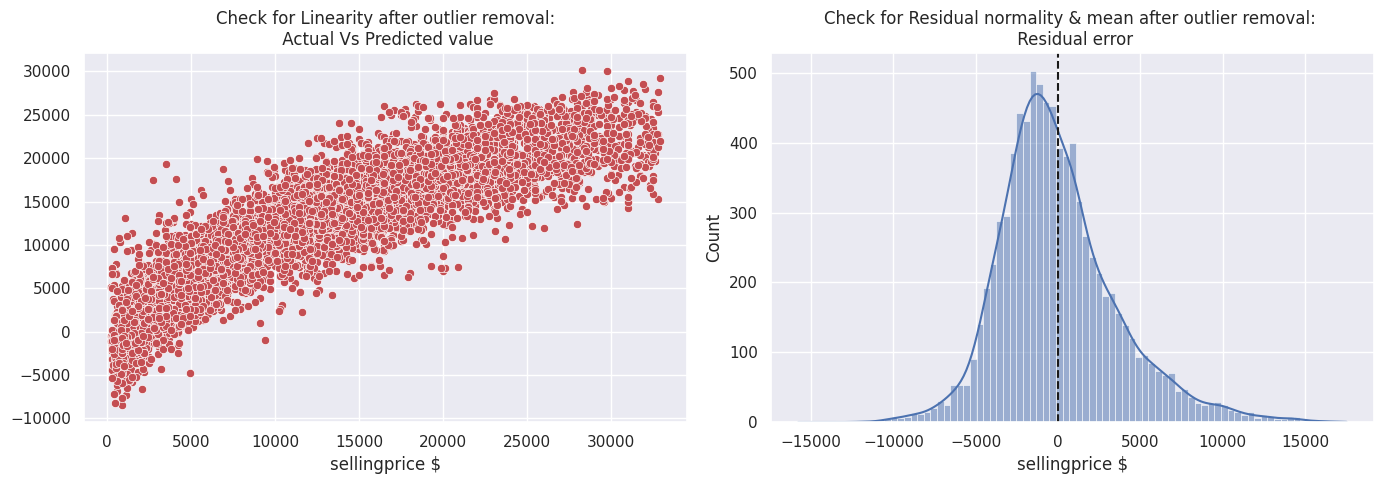

In [ ]:
#Z-score used to identify outliers in 'odometer' and 'sellingprice'
z_odometer= np.abs(stats.zscore(df['odometer (mi)']))
z_sellingprice = np.abs(stats.zscore(df['sellingprice $'])) #calculating the z-score for odometer and selling price since we observed outliers in both of them
threshold = 2 #here we decided the threshold would be 2
outlier_indices_odometer= np.where(z_odometer> threshold)[0]
outlier_indices_sellingprice= np.where(z_sellingprice> threshold)[0] #here any value whose z-score is greater than the threshold would be an outlier

all_outlier_indices = np.unique(np.concatenate([outlier_indices_odometer, outlier_indices_sellingprice]))
df_no_outliers = df.drop(all_outlier_indices) #here any outlier would be dropped
x_no_outliers = df_no_outliers.drop('sellingprice $',axis=1) #independent variable
y_no_outliers = df_no_outliers['sellingprice $'] #dependent variable
x_train_no_outliers, x_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    x_no_outliers, y_no_outliers, test_size=0.2, random_state=23
)

#same steps for linear regression as before are repeated here but with different variable names
lin_reg_no_outliers = LinearRegression()
lin_reg_no_outliers.fit(x_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = lin_reg_no_outliers.predict(x_test_no_outliers)

from sklearn.metrics import mean_squared_error
rmse_no_outliers = np.sqrt(mean_squared_error(y_pred_no_outliers, y_test_no_outliers))
R_square_no_outliers = lin_reg_no_outliers.score(x_test_no_outliers, y_test_no_outliers)

#same streps for evaluation as before are repeated here but with different variable names
print('The root mean square error (RMSE) after outlier removal is: ', rmse_no_outliers)
print('R^2 obtained after outlier removal is:', R_square_no_outliers)
f_no_outliers = plt.figure(figsize=(14, 5))
ax_no_outliers = f_no_outliers.add_subplot(121)
sns.scatterplot(x=y_test_no_outliers, y=y_pred_no_outliers, ax=ax_no_outliers, color='r')
ax_no_outliers.set_title('Check for Linearity after outlier removal:\n Actual Vs Predicted value')
ax_no_outliers = f_no_outliers.add_subplot(122)
sns.histplot(x=(y_test_no_outliers - y_pred_no_outliers), ax=ax_no_outliers, color='b', kde=True)
ax_no_outliers.axvline((y_test_no_outliers - y_pred_no_outliers).mean(), color='k', linestyle='--')
ax_no_outliers.set_title('Check for Residual normality & mean after outlier removal: \n Residual error')
plt.tight_layout()
plt.show()

## Comparison

We applied the z-score method to remove any outliers using some assistance from coding websites like geeksforgeeks for assistance, the way it works is after standardizing the dataset into one format, the algorithm compares each data point to a threshold. The threshold we chose was z-score=2, so every point that exceeded this threshold was considered an outlier and was hence removed from the model.
This showed some improvements when we evaluated the data. The RMSE changed to 3608 when it was previously 5448, which means that the average difference between predictions and actual values is now 1,840 less than before. Which means that accuracy has increased and that the model’s predictions are matching actual values better

After applying normalization to the model, the R^2 Value went from the previous 0.6788013037728272 to 0.7482322111603426 (approximately 74.8%), which means that the new model can predict the Selling Price of a car given its Make, Body, Odometer, Condition, and Year with a 74.8% accuracy. It’s important to note that the refined model eliminated outliers making it much more accurate & reliable without noisy data.